### Importing Packages

In [2]:
# For Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

# For Data Visualization

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo

from plotly.subplots import make_subplots
from plotly.offline import plot


# For Additional Use
import datetime
import calendar


# Template
pio.templates.default = "ggplot2"

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


### Data Checking

In [3]:
df = pd.read_csv('Startups in 2021 end.csv',index_col=0)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           936 non-null    object
 1   Valuation ($B)    936 non-null    object
 2   Date Joined       936 non-null    object
 3   Country           936 non-null    object
 4   City              921 non-null    object
 5   Industry          936 non-null    object
 6   Select Investors  935 non-null    object
dtypes: object(7)
memory usage: 58.5+ KB


In [5]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,936,936,936,936,921,936,935
unique,935,192,589,47,239,17,920
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,"Speedinvest, Valar Ventures, Uniqa Ventures"
freq,2,225,8,477,134,190,2


<Axes: >

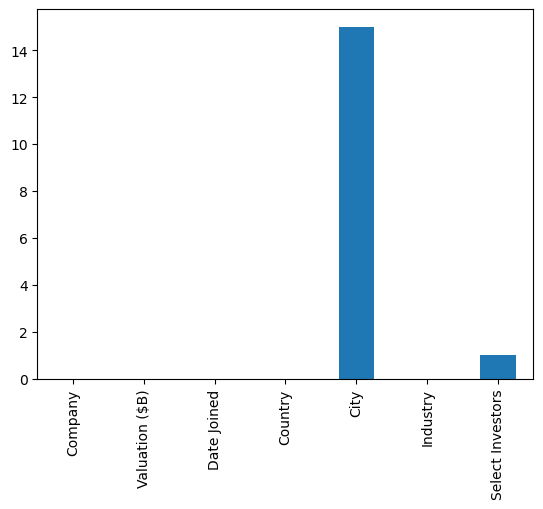

In [6]:
df.isnull().sum().plot(kind='bar')

### Data Preprocessing

#### Renaming Columns

In [7]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors'],
      dtype='object')

In [8]:
column_name_remapping = {
    'Company' : 'Name',
    'Valuation ($B)' : 'Valuation',
    'Date Joined' : 'Date',
    'Country' : 'Country',
    'City' : 'City',
    'Industry' : 'Industry',
    'Select Investors' : 'Investors',
}

In [9]:
df.rename(columns=column_name_remapping, inplace= True)
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Valuation'] = df['Valuation'].str.replace('$','').str.replace(',','').astype(float)

In [12]:
df['Name'].value_counts()

Bolt              2
Bytedance         1
Prime Medicine    1
Pilot.com         1
Aibee             1
                 ..
Skydance Media    1
Greenlight        1
Highspot          1
Bowery Farming    1
Pet Circle        1
Name: Name, Length: 935, dtype: int64

In [13]:
df[df['Name']== 'Bolt']

,Name,Valuation,Date,Country,City,Industry,Investors
94,Bolt,6.00,2021-10-08,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
141,Bolt,4.75,2018-05-29,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"


In [14]:
df['Year'] = df['Date'].dt.year
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


#### List of Investors

In [15]:
from collections import Counter

investors = []
for i in df['Investors'].dropna().str.split(','):
    for j in i:
        investors.append(j)

investor_counts = Counter(investors)
df_investor = pd.DataFrame.from_dict(investor_counts, orient='index', columns=['Frequency'])
df_investor

,Frequency
Sequoia Capital China,29
SIG Asia Investments,3
Sina Weibo,2
Softbank Group,8
Founders Fund,4
...,...
RRE Ventures+,1
FTV Capital,1
Ten Eleven Ventures,1
Prysm Capital,1


In [16]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


#### Standardization

##### Industry

In [17]:
df['Industry'] = df['Industry'].replace(['Artificial Intelligence ','Artificial intelligence','Finttech'],['Artificial Intelligence','Artificial Intelligence', 'Fintech'])
df['Industry'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel'], dtype=object)

##### Country

In [18]:
df['Country'] = df['Country'].replace(['United States,','Indonesia,'],['United States','Indonesia'])
df['Country'].unique()


array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia'], dtype=object)

##### City

In [19]:
df[df['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year
11,FTX,25.0,2021-07-20,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",2021
192,HyalRoute,3.5,2020-05-26,Singapore,NaN,Mobile & telecommunications,Kuang-Chi,2020
399,Advance Intelligence Group,2.0,2021-09-23,Singapore,NaN,Artificial Intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",2021
572,Trax,1.3,2019-07-22,Singapore,NaN,Artificial Intelligence,"Hopu Investment Management, Boyu Capital, DC T...",2019
677,Amber Group,1.1,2021-06-21,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021
682,Carousell,1.1,2021-09-15,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021
735,WeLab,1.0,2017-11-08,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",2017
812,PatSnap,1.0,2021-03-16,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner...",2021
840,Moglix,1.0,2021-05-17,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",2021
843,Matrixport,1.0,2021-06-01,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS...",2021


In [20]:
df.loc[df['Country']=='Hong Kong', 'City'] = 'Hong Kong'
df.loc[df['Country']=='Singapore', 'City'] = 'Singapore'

In [21]:
df[df['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


##### Investors

In [22]:
df[df['Investors'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year
710,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN,2015


In [23]:
df = df.dropna(subset=['Investors'])

In [24]:
df[df['Investors'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


<Axes: >

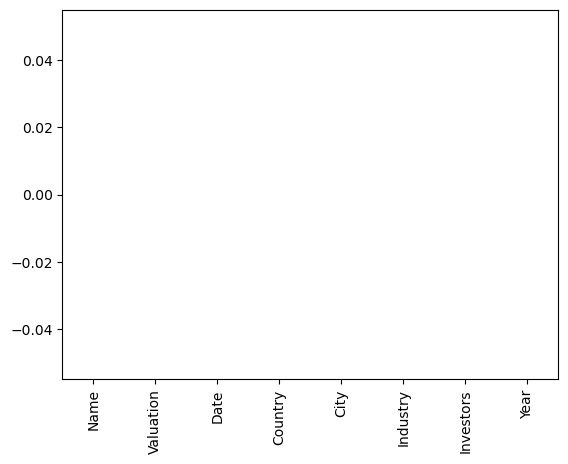

In [25]:
df.isnull().sum().plot(kind='bar')

### Analysis

#### Distribution

##### Valuation

In [26]:
df.head(10)

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2014
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2019
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2018
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",2018
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",2018


All Industries

In [27]:
df_year_total = df.groupby('Year')['Valuation'].sum()
df_year_total = pd.DataFrame(df_year_total).reset_index()
df_year_total

,Year,Valuation
0,2007,1.38
1,2010,3.00
2,2011,51.30
3,2012,122.30
4,2013,4.30
5,2014,165.38
6,2015,98.55
7,2016,81.04
8,2017,296.14
9,2018,495.47


In [28]:
fig0 = px.bar(df_year_total, x="Year", y="Valuation")
fig0.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation')
fig0.show()

In [29]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [30]:
df_year_quant = pd.DataFrame(df.groupby('Year')['Name'].nunique().reset_index())
df_year_quant.columns = ['Year','Quantity']
df_year_quant

,Year,Quantity
0,2007,1
1,2010,1
2,2011,2
3,2012,4
4,2013,3
5,2014,13
6,2015,36
7,2016,22
8,2017,46
9,2018,107


In [31]:
fig21 = px.bar(df_year_quant,x="Year",y="Quantity")
fig21.update_layout(xaxis_title='Year',yaxis_title='Quantity',title='Number of Startups by Year')
fig21.show()

Total valuation for the unicorn startup for the duration of 14 years, from 2007 to 2021 shows a cyclical trend. The first cycle lasted for 7 years, between 2007 to 2014 saw the total valuation of unicorn startups increased from $1.38 billion in 2017 to $165.38 billion by 2014. The second cycle, from 2015 to 2018 saw the total valuation increase from $98.55 billion to $495.47 billion, before declining to $362.48 billion by 2020. It increased drastically in 2021 to $972.74 billion. 

On the contrary, the number of startups showed a persistent increase. Between 2007 to 2013, the number of unicorn startups remain at single digit, ranging between 1 to 4 unicorn startups each year. The number of unicorn startups grew to double digit between 2014 to 2017. In 2014, the number of unicorn startups is 13 and by 2017, the number increased to 46. In 2018, the number of unicorn startups doubled to 107. In 2021, the number of unicorn startups grew at a much more rapid pace. The number increased four-fold from 110 in 2020 to 480 in 2021. 

 

In [32]:
fig1 = px.histogram(df, x="Valuation", nbins=100,marginal='box')
fig1.update_layout(xaxis_title='Valuation',yaxis_title='Frequency',title='Distribution of Valuation Overall')
fig1.show()


In [33]:
df_below_3 = df[df['Valuation']< 3].reset_index(drop=True)
len(df_below_3)

673

In [34]:
df_above_3 = df[df['Valuation']>= 3].reset_index(drop=True)
print('No of entity: ',len(df_above_3))

No of entity:  262


In [35]:
df_above_3_max = df_above_3['Valuation'].max()
df_above_3_min = df_above_3['Valuation'].min()
range_df_above_3 = df_above_3['Valuation'].max() - df_above_3['Valuation'].min()
print('Maximum Valuation:', df_above_3_max)
print('Minimum Valuation:', df_above_3_min)
print('Range:', range_df_above_3)

Maximum Valuation: 140.0
Minimum Valuation: 3.0
Range: 137.0


Overall, three fourth or 673 of the unicorn startups were valued below $3 billion. From that, half of the unicorn startups throughout the period from 2007 to 2021 were valued between $1billion to $2.99 billion, with half of the startups were valued between $1 billion to $1.6 billion. Meanwhile, 262 unicorn startups are valued above $3 billion, ranging from $3 billion to $140 billion. 

In [36]:
industries = df['Industry'].unique()
industries

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel'], dtype=object)

In [37]:
quantiles_iqr_by_industry = {}
for industry in industries:
    df_industry = df[df['Industry']==industry]
    q1 = df_industry['Valuation'].quantile(0.25)
    q2 = df_industry['Valuation'].quantile(0.5)
    q3 = df_industry['Valuation'].quantile(0.75)
    iqr = q3 - q1
    quantiles_iqr_by_industry[industry] = {'Q1': q1, 'Q2': q2,'Q3': q3, 'IQR': iqr}

In [38]:
  for industry, stats in quantiles_iqr_by_industry.items():
        print(f'{industry}:')
        print(f'Q1: {stats["Q1"]}')
        print(f'Q2: {stats["Q2"]}')
        print(f'Q3: {stats["Q3"]}')
        print(f'IQR: {stats["IQR"]}')

Artificial Intelligence:
Q1: 1.0
Q2: 1.5
Q3: 2.3
IQR: 1.2999999999999998
Other:
Q1: 1.085
Q2: 1.55
Q3: 2.75
IQR: 1.665
Fintech:
Q1: 1.1
Q2: 1.85
Q3: 3.2
IQR: 2.1
Internet software & services:
Q1: 1.185
Q2: 1.65
Q3: 3.0
IQR: 1.815
Supply chain, logistics, & delivery:
Q1: 1.0
Q2: 1.17
Q3: 2.1
IQR: 1.1
Data management & analytics:
Q1: 1.2
Q2: 1.61
Q3: 3.4125
IQR: 2.2125000000000004
Edtech:
Q1: 1.0
Q2: 1.5
Q3: 3.0
IQR: 2.0
E-commerce & direct-to-consumer:
Q1: 1.1
Q2: 1.56
Q3: 3.1
IQR: 2.0
Hardware:
Q1: 1.0
Q2: 1.5750000000000002
Q3: 3.3625
IQR: 2.3625
Health:
Q1: 1.02
Q2: 1.5
Q3: 3.41
IQR: 2.39
Consumer & retail:
Q1: 1.05
Q2: 1.59
Q3: 2.125
IQR: 1.075
Auto & transportation:
Q1: 1.48
Q2: 2.41
Q3: 3.31
IQR: 1.83
Cybersecurity:
Q1: 1.2
Q2: 1.8
Q3: 2.74
IQR: 1.5400000000000003
Mobile & telecommunications:
Q1: 1.0
Q2: 1.4
Q3: 2.8499999999999996
IQR: 1.8499999999999996
Travel:
Q1: 1.3
Q2: 1.5
Q3: 3.0
IQR: 1.7


Valuation distribution between the industries varied. Health startups have the widest range of valuation within the middle 50% of the companies, ranging from $1 billion to $3.465 billion, with half of the companies valued between $1 billion to $1.5 billion. 4 unicorn health startups fell into the outlier, with the valuation between $7.83 billion to $12.6 billion.  

For hardware unicorn startups, the valuation within the middle 50% of the companies were ranging between $1 billion to $3.575 billion with half of the companies valued between $1 billion to $1.575 billion, with 3 startups were valued higher than its distribution, between $11 billion to $15 billion.  

Meanwhile, the range of valuation for the middle 50% of the unicorn startups in Data Management & Analytics is between $1.2 billion to $3.475 billion. From this, half of the startups in the industry were valued between $1 billion to $1.61 billion. 

Wide range of valuation for these three industries may indicate of the followings: 

<ol> 

<li>Broad spectrum of investment opportunities</li> 

<li>Dynamic and competitive ecosystem </li> 

<li>Probability of the presence of economic or investment bubble</li> 

</ol> 

Meanwhile, Consumer & Retail industry recorded the lowest range of valuation within the middle 50% of the companies, ranging from $1.05 billion to $2.125 billion with half of them were valued between $1 billion to $1.61 billion. 4 of startups were valued higher than the industry, ranging between $4 billion to $12 billion. 

The middle 50% of the unicorn startups valuation for Supply Chain, Logistics & Delivery industry is between $1 billion to $2.15 billion with half the startups in the industry valued between $1 billion to $1.17 billion. 5 startups in the industry valued at higher valuation compared with the industry, ranging from $5.25 billion to $39 billion. 

For Artificial Intelligence industry, range of valuation within the middle 50% of the companies ranged between $1 billion to $2.4175 billion, with half of the startups in the industry valued between $1 billion to $1.5 billion. 11 startups were valued higher with the industry, with 10 of them were valued between $4.6 billion to $12.40 billion with one startup valued highest in the overall market, at $140 billion. 

Smaller range of valuation for these three industries indicates the followings: 

<ol> 

<li>Market maturity and predictability</li> 

<li>Relatively lower risk compared with industry with wider range of valuation</li> 

<li>Market concentrated within few companies</li> 

</ol> 

However, extreme outliers as displayed by Supply Chain, Logistics & Delivery and Artificial Intelligence industry may indicate potential significant risks to the industry

In [39]:
ai_oulier_df = df.loc[(df['Industry'] == 'Artificial Intelligence') & (df['Valuation'] > 4.1)].reset_index(drop=True)
ai_oulier_df


,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.00,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,Faire,12.40,2019-10-30,United States,San Francisco,Artificial Intelligence,"Khosla Ventures, Forerunner Ventures, Sequoia ...",2019
2,SenseTime,12.00,2017-07-11,China,Shanghai,Artificial Intelligence,"Star VC, IDG Capital, Infore Capital, Alibaba ...",2017
3,Scale AI,7.30,2019-08-05,United States,San Francisco,Artificial Intelligence,"Accel, Y Combinator, Index Ventures",2019
4,Argo AI,7.25,2019-07-12,United States,Pittsburgh,Artificial Intelligence,"Volkswagen Group, Ford Autonomous Vehicles",2019
5,Gong,7.25,2020-08-12,United States,Palo Alto,Artificial Intelligence,"Norwest Venture Partners, Next World Capital, ...",2020
6,Automation Anywhere,6.80,2018-07-02,United States,San Jose,Artificial Intelligence,"General Atlantic, Goldman Sachs, New Enterpris...",2018
7,DataRobot,6.30,2019-07-29,United States,Boston,Artificial Intelligence,"New Enterprise Associates, Accomplice, IA Vent...",2019
8,Pony.ai,5.30,2018-07-11,United States,Fremont,Artificial Intelligence,"Sequoia Capital China, IDG Capital, DCM Ventures",2018
9,Horizon Robotics,5.00,2019-02-27,China,Beijing,Artificial Intelligence,"Hillhouse Capital Management, Linear Venture, ...",2019


In [40]:
unique_industries = df['Industry'].unique()

for industry in unique_industries:
    df_industry = df[df['Industry']==industry]
    fig = px.histogram(df_industry, x="Valuation", nbins=100,marginal='box')
    fig.update_layout(xaxis_title='Valuation',yaxis_title='Frequency',title=f'Distribution of Valuation for {industry}')
    fig.show()

In [41]:
#unique_industries

#for industry in unique_industries:
    #df_industry = df[df['Industry']==industry]
    #fig2 = px.box(df_industry, x="Year", y= 'Valuation')
    #fig2.update_layout(xaxis_title='Year',yaxis_title='Valuation',title=f'Distribution of Valuation for {industry} by Year')
    #fig2.show()

In [42]:
df_year_industry_valuation_total = df.groupby(['Year','Industry'])['Valuation'].sum().reset_index()
df_year_industry_valuation_total = pd.DataFrame(df_year_industry_valuation_total)
df_year_industry_valuation_total

,Year,Industry,Valuation
0,2007,E-commerce & direct-to-consumer,1.38
1,2010,E-commerce & direct-to-consumer,3.00
2,2011,Fintech,45.60
3,2011,Internet software & services,5.70
4,2012,Artificial Intelligence,2.00
...,...,...,...
106,2021,Internet software & services,218.60
107,2021,Mobile & telecommunications,9.75
108,2021,Other,32.33
109,2021,"Supply chain, logistics, & delivery",49.80


In [43]:
df[(df['Year'] == 2014) & (df['Industry'] == 'Fintech')]


,Name,Valuation,Date,Country,City,Industry,Investors,Year
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014


In [44]:
fig3 = px.bar(df_year_industry_valuation_total, x="Year", y="Valuation", color="Industry", barmode='group',color_discrete_sequence=px.colors.qualitative.Pastel)
fig3.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation by Year and Industry')
fig3.show()

In [45]:
df_year_total = df_year_total.rename(columns={'Valuation':'Total Valuation'})
df_year_total

,Year,Total Valuation
0,2007,1.38
1,2010,3.00
2,2011,51.30
3,2012,122.30
4,2013,4.30
5,2014,165.38
6,2015,98.55
7,2016,81.04
8,2017,296.14
9,2018,495.47


In [46]:
fig23 = px.bar(df_year_total, x="Year", y="Total Valuation")
fig23.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation')
fig23.show()

In [47]:
df_year_industry_percentage = df_year_industry_valuation_total.merge(df_year_total, on='Year')
df_year_industry_percentage['Percentage'] = df_year_industry_percentage['Valuation']/df_year_industry_percentage['Total Valuation']*100
df_year_industry_percentage

,Year,Industry,Valuation,Total Valuation,Percentage
0,2007,E-commerce & direct-to-consumer,1.38,1.38,100.000000
1,2010,E-commerce & direct-to-consumer,3.00,3.00,100.000000
2,2011,Fintech,45.60,51.30,88.888889
3,2011,Internet software & services,5.70,51.30,11.111111
4,2012,Artificial Intelligence,2.00,122.30,1.635323
...,...,...,...,...,...
106,2021,Internet software & services,218.60,972.74,22.472603
107,2021,Mobile & telecommunications,9.75,972.74,1.002323
108,2021,Other,32.33,972.74,3.323601
109,2021,"Supply chain, logistics, & delivery",49.80,972.74,5.119559


In [48]:
fig5 = px.bar(df_year_industry_percentage, x="Year", y="Percentage", color="Industry", barmode='stack',color_discrete_sequence=px.colors.qualitative.Pastel)
fig5.update_layout(xaxis_title='Year',yaxis_title='Percentage',title='Percentage of Valuation by Year and Industry')
fig5.show()


In [49]:
df_year_industry_valuation_count = df.groupby(['Year','Industry'])['Valuation'].count().reset_index()
df_year_industry_valuation_count = pd.DataFrame(df_year_industry_valuation_count)
df_year_industry_valuation_count = df_year_industry_valuation_count.rename(columns={'Valuation':'Number'})
df_year_industry_valuation_count


,Year,Industry,Number
0,2007,E-commerce & direct-to-consumer,1
1,2010,E-commerce & direct-to-consumer,1
2,2011,Fintech,1
3,2011,Internet software & services,1
4,2012,Artificial Intelligence,1
...,...,...,...
106,2021,Internet software & services,109
107,2021,Mobile & telecommunications,6
108,2021,Other,18
109,2021,"Supply chain, logistics, & delivery",25


In [50]:
fig4 = px.bar(df_year_industry_valuation_count, x="Year", y="Number", color="Industry", barmode='group',color_discrete_sequence=px.colors.qualitative.Pastel)
fig4.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Number of Startups by Year and Industry')
fig4.show()

In the early period between 2007 to 2010, e-commerce and direct to consumer startupps emerged as the early unicorn startup.  Veepe was valued at $1.38 billion in 2007 while VANCL was valued at $3 billion in 2010. By 2011, unicorn startups started to emerge from other industries. In 2011, Fintech startups was valued at $45.6 billion while cumulative valuation for  internet software and services startups was $5.7 billion.

2012 saw the emergence of startups from new industries, including consumer retail, artificial intelligence, and aerospace and space exploration (categorized as "Others"). Consumer and retail startups and artificial intelligence startups raised $2 billion each in cumulative funding. SpaceX was the biggest unicorn startup of the year, with a valuation of $100.3 billion, representing 82.01% of the total valuation for the year. It became the highest-valued unicorn startup until 2017. E-commerce and direct-to-consumer startups raised a cumulative total of $18 billion in 2012. However, in 2013, the total valuation for unicorn startups collectively dipped to $4.3 billion. The year also saw the emergence of unicorn startups from the data management and analytics and cybersecurity industries, valued at $1.5 billion and $1 billion respectively. Startups from the internet software and services industry raised $1.8 billion, lower than the $5.7 billion raised in 2011.

In 2014, a significant resurgence of unicorn startups became evident, spanning across various industries. The cumulative valuation of these startups saw a remarkable upswing, soaring from $4.3 billion in 2013 to a staggering $165.38 billion in 2014. This remarkable transformation was accompanied by a surge in the emergence of unicorn startups from a broader spectrum of industries. The total count of these startups reached 14, which was nearly on par with the cumulative count from the previous seven years. Fintech represents more than half of the total valuation of unicorn startups for the year, folllowed by supply chain, logistics & delivery and auto & transportation. Despite a drop in total valuation to double digits in 2015 and 2016, the number of unicorn startups increased drastically and became much more diverse, with 33 startups reaching a combined valuation of $98.55 billion in 2015 and 24 startups with the total valuation of $81.04 billion in 2016.

In 2017, total unicorn startup valuation returned to three digits, reaching $296.14 billion. The number of unicorn startups increased to 46 companies across 12 industries, dominated by the rise of ByteDance, an artificial intelligence startup valued at $140 billion, comprising over half of the total startup valuation for the year. Edtech unicorn startups emerged in 2017, collectively valued at $39.18 billion, or 9.25% of the total valuation. The health industry also saw higher growth in 2017, with four unicorn startups valued at a total of $10.82 billion, up from $8.8 billion in 2015 and $1 billion in 2016. 1

Total unicorn startup valuation increased further in 2018 to $495.47 billion, with more than 100 unicorn startups across 15 industries. Unlike 2017, unicorn startups in 2018 were much more diverse, with no single industry dominating. Fintech and internet software & services remained major contributors to the emergence of unicorn startups.  11 fintech unicorn startuos emerged with total valuation of $114.63 billion. 15 internet software & services with total valuation of $102.1 billion also emergen within the same year. Meanwhile, increasing interest and rapid development in artificial intelligence led to the continued emergence of unicorn startups since 2015. In 2018, 13 artificial intelligence unicorn startups emerged with total valuation of $35.13 billion emerged in 2018.

Despite the decline in total valuation from $495 billion in 2018 to $416.08 billion in 2019, the trend towards diversification continued. Unicorn startups from fintech, internet software & services, artificial intelligence, and e-commerce & direct to consumer industries continued to dominate in terms of both number and total valuation, accounting for 60.8% ($251.6 billion) of the total valuation for the year and 56% (62) of the 110 unicorn startups. The decline in total valuation continued in 2020, with total valuation for 110 unicorn startups declining to $362.48 billion. However, there was a slight shift in the industry distribution, with fintech and internet software & services startups continuing their dominance, while e-commerce & direct to consumer startups saw an increase in total valuation at the expense of the artificial intelligence industry. Total valuation for health startups also increased from $9.18 billion in 2019 to $25.21 billion in 2020, although it was still lower than the $35.7 billion valuation in 2018.

However, the trend for the last two years has reversed, with total unicorn startup valuation increasing to almost $1 trillion, reaching $972.74 billion. The total number of unicorn startups has also increased significantly, from 110 in 2020 to 480 startups, dominated by fintech and internet software & services startups, with a combined total of 240 startups. These two industries had a total valuation of $514 billion, accounting for 52% of the total valuation for the year.

In [51]:
df_country = pd.DataFrame(df.groupby(['Year','Country','Industry','Name'])['Valuation'].sum()).reset_index()
df_country.tail(20)

,Year,Country,Industry,Name,Valuation
915,2021,United States,Other,Bowery Farming,2.30
916,2021,United States,Other,Cava Group,1.30
917,2021,United States,Other,Diamond Foundry,1.80
918,2021,United States,Other,Firefly Aerospace,1.00
919,2021,United States,Other,Inari,1.20
920,2021,United States,Other,Printful,1.00
921,2021,United States,Other,Redwood Materials,3.70
922,2021,United States,Other,Sentry,1.00
923,2021,United States,Other,Trader Interactive,1.63
924,2021,United States,Other,Uplight,1.50


In [52]:
df_country[(df_country['Year']==2020) & (df_country['Industry']=='Fintech')]

,Year,Country,Industry,Name,Valuation
346,2020,Brazil,Fintech,C6 Bank,5.05
347,2020,Brazil,Fintech,Creditas,1.75
369,2020,India,Fintech,National Stock Exchange of India,6.50
370,2020,India,Fintech,Pine Labs,3.00
371,2020,India,Fintech,Razorpay,3.00
375,2020,Israel,Fintech,Pagaya,2.00
381,2020,Netherlands,Fintech,Mollie,6.50
413,2020,United States,Fintech,Better.com,6.00
414,2020,United States,Fintech,Chainalysis,4.20
415,2020,United States,Fintech,Greenlight,2.30


In [53]:
df_country['Country'].unique()

array(['France', 'China', 'Sweden', 'United States', 'Hong Kong', 'India',
       'South Korea', 'Colombia', 'United Kingdom', 'Israel',
       'South Africa', 'Switzerland', 'Bermuda', 'Germany', 'Indonesia',
       'Philippines', 'United Arab Emirates', 'Australia', 'Brazil',
       'Estonia', 'Finland', 'Japan', 'Netherlands', 'Spain', 'Belgium',
       'Lithuania', 'Luxembourg', 'Singapore', 'Canada', 'Croatia',
       'Ireland', 'Mexico', 'Argentina', 'Austria', 'Chile',
       'Czech Republic', 'Denmark', 'Malaysia', 'Nigeria', 'Norway',
       'Santa Clara', 'Senegal', 'Thailand', 'Turkey', 'Vietnam'],
      dtype=object)

In [54]:
country_to_region = {
    'France' : 'Europe',
    'China' : 'Asia',
    'Sweden' : 'Europe',
    'United States' : 'North America',
    'Hong Kong' : 'Asia',
    'India' : 'Asia',
    'South Korea' : 'Asia',
    'Colombia' : 'South America',
    'United Kingdom' : 'Europe',
    'Israel' : 'Europe',
    'South Africa': 'Africa',
    'Switzerland': 'Europe',
    'Bermuda': 'North America',
    'Germany': 'Europe',
    'Indonesia': 'Asia',
    'Philippines' : 'Asia',
    'United Arab Emirates' : 'Asia',
    'Australia' : 'Oceania',
    'Brazil' : 'South America',
    'Estonia' : 'Europe',
    'Finland' : 'Europe',
    'Japan' : 'Asia',
    'Netherlands': 'Europe',
    'Spain': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Singapore': 'Asia',
    'Canada': 'North America',
    'Croatia': 'Europe',
    'Ireland': 'Europe',
    'Mexico': 'North America',
    'Argentina': 'South America',
    'Austria': 'Europe',
    'Chile': 'South America',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Malaysia': 'Asia',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Santa Clara': 'South America',
    'Senegal': 'Africa',
    'Thailand': 'Asia',
    'Turkey': 'Asia',
    'Vietnam': 'Asia',
    
}

In [55]:
df_country['Region'] = df_country['Country'].apply(lambda x: country_to_region.get(x))
df_country.head()


,Year,Country,Industry,Name,Valuation,Region
0,2007,France,E-commerce & direct-to-consumer,Veepee,1.38,Europe
1,2010,China,E-commerce & direct-to-consumer,VANCL,3.00,Asia
2,2011,Sweden,Fintech,Klarna,45.60,Europe
3,2011,United States,Internet software & services,Vice Media,5.70,North America
4,2012,Hong Kong,Consumer & retail,Trendy Group International,2.00,Asia


In [56]:
df_country_region = pd.DataFrame(df_country.groupby(['Year','Region'])['Valuation'].sum()).reset_index()
df_country_region.head()

,Year,Region,Valuation
0,2007,Europe,1.38
1,2010,Asia,3.00
2,2011,Europe,45.60
3,2011,North America,5.70
4,2012,Asia,2.00


In [57]:
fig6 = px.bar(df_country_region, x="Year", y="Valuation", color="Region", barmode='stack',color_discrete_sequence=px.colors.qualitative.Pastel)
fig6.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation by Year and Region')
fig6.show()

In [58]:
df_country.head(10)

,Year,Country,Industry,Name,Valuation,Region
0,2007,France,E-commerce & direct-to-consumer,Veepee,1.38,Europe
1,2010,China,E-commerce & direct-to-consumer,VANCL,3.00,Asia
2,2011,Sweden,Fintech,Klarna,45.60,Europe
3,2011,United States,Internet software & services,Vice Media,5.70,North America
4,2012,Hong Kong,Consumer & retail,Trendy Group International,2.00,Asia
5,2012,United States,Artificial Intelligence,Avant,2.00,North America
6,2012,United States,E-commerce & direct-to-consumer,Fanatics,18.00,North America
7,2012,United States,Other,SpaceX,100.30,North America
8,2013,United States,Cybersecurity,Lookout,1.00,North America
9,2013,United States,Data management & analytics,Mu Sigma,1.50,North America


In [59]:
df_region_asia = df_country[df_country['Region']=='Asia'].reset_index().drop(columns=['index'])
df_region_asia.head(10)

,Year,Country,Industry,Name,Valuation,Region
0,2010,China,E-commerce & direct-to-consumer,VANCL,3.00,Asia
1,2012,Hong Kong,Consumer & retail,Trendy Group International,2.00,Asia
2,2014,China,E-commerce & direct-to-consumer,Koudai,1.40,Asia
3,2014,China,Hardware,Meizu Technology,4.58,Asia
4,2014,India,Auto & transportation,Ola Cabs,7.50,Asia
5,2014,India,E-commerce & direct-to-consumer,Snapdeal,1.00,Asia
6,2014,India,Mobile & telecommunications,InMobi,1.00,Asia
7,2014,South Korea,Mobile & telecommunications,Yello Mobile,4.00,Asia
8,2015,China,E-commerce & direct-to-consumer,BeiBei,1.00,Asia
9,2015,China,E-commerce & direct-to-consumer,Jiuxian,1.05,Asia


Valuation Distribution for Startup In Asia

In [60]:
fig10 = px.histogram(df_region_asia, x="Valuation", nbins=100,marginal='box')
fig10.update_layout(xaxis_title='Valuation',yaxis_title='Frequency',title='Distribution of Valuation (Asia)')
fig10.show()

In [61]:
fig11 = px.box(df_region_asia, x="Year", y= 'Valuation')
fig11.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Distribution of Valuation (Asia)')
fig11.show()

In [62]:
df_region_asia_country_valuation = df_region_asia.groupby('Year')['Valuation'].sum().reset_index()
df_region_asia_country_valuation.head()

,Year,Valuation
0,2010,3.00
1,2012,2.00
2,2014,19.48
3,2015,50.23
4,2016,57.75


In [63]:
df_region_asia_total = pd.DataFrame(df_region_asia.groupby(['Year','Country'])['Valuation'].sum()).reset_index()
df_region_asia_total.head()

,Year,Country,Valuation
0,2010,China,3.00
1,2012,Hong Kong,2.00
2,2014,China,5.98
3,2014,India,9.50
4,2014,South Korea,4.00


In [64]:
fig8 = px.line(df_region_asia_country_valuation, x="Year", y="Valuation")
fig8.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation by Year and Country (Asia)')
fig8.show()

In [65]:
fig7 = go.Figure()
fig7 = px.bar(df_region_asia_total, x="Year", y="Valuation", color="Country", barmode='stack',color_discrete_sequence=px.colors.qualitative.Pastel)
fig7.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation by Year and Country (Asia)')
fig7.show()


In [66]:
df_region_asia_total_industry = df_region_asia.groupby(['Year','Industry'])['Valuation'].sum().reset_index()
df_region_asia_total_industry

,Year,Industry,Valuation
0,2010,E-commerce & direct-to-consumer,3.00
1,2012,Consumer & retail,2.00
2,2014,Auto & transportation,7.50
3,2014,E-commerce & direct-to-consumer,2.40
4,2014,Hardware,4.58
...,...,...,...
77,2021,Health,7.05
78,2021,Internet software & services,23.88
79,2021,Mobile & telecommunications,2.30
80,2021,Other,5.17


In [67]:
fig8 = px.bar(df_region_asia_total_industry, x="Year", y="Valuation", color="Industry", barmode='stack',color_discrete_sequence=px.colors.qualitative.Pastel)
fig8.update_layout(xaxis_title='Year',yaxis_title='Valuation',title='Total Valuation by Year and Industry (Asia)')
fig8.show()

In [68]:
df_region_asia[df_region_asia['Year']==2017]

,Year,Country,Industry,Name,Valuation,Region
40,2017,China,Artificial Intelligence,Bytedance,140.00,Asia
41,2017,China,Artificial Intelligence,MEGVII,4.00,Asia
42,2017,China,Artificial Intelligence,SenseTime,12.00,Asia
43,2017,China,Consumer & retail,Mobvoi,1.00,Asia
44,2017,China,Data management & analytics,DT Dream,1.50,Asia
45,2017,China,E-commerce & direct-to-consumer,DianRong,1.00,Asia
46,2017,China,E-commerce & direct-to-consumer,Huitongda,3.18,Asia
47,2017,China,E-commerce & direct-to-consumer,SouChe Holdings,3.00,Asia
48,2017,China,E-commerce & direct-to-consumer,Zhaogang,1.00,Asia
49,2017,China,E-commerce & direct-to-consumer,Zhuan Zhuan,1.00,Asia


# Trial

In [69]:
min(df['Valuation'])

1.0

In [70]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [71]:
trial_year_industry = df.groupby(['Year','Industry'])['Valuation'].sum()
trial_year_industry

Year  Industry                           
2007  E-commerce & direct-to-consumer          1.38
2010  E-commerce & direct-to-consumer          3.00
2011  Fintech                                 45.60
      Internet software & services             5.70
2012  Artificial Intelligence                  2.00
                                              ...  
2021  Internet software & services           218.60
      Mobile & telecommunications              9.75
      Other                                   32.33
      Supply chain, logistics, & delivery     49.80
      Travel                                   5.00
Name: Valuation, Length: 111, dtype: float64

In [72]:
trial_year_country = df.groupby(['Year','Country'])['Valuation'].sum()
trial_year_country

Year  Country             
2007  France                    1.38
2010  China                     3.00
2011  Sweden                   45.60
      United States             5.70
2012  Hong Kong                 2.00
                               ...  
2021  Turkey                    8.50
      United Arab Emirates      1.00
      United Kingdom           28.78
      United States           551.04
      Vietnam                   3.00
Name: Valuation, Length: 127, dtype: float64

In [73]:
trial_year_industry[2021]

Industry
Artificial Intelligence                 44.15
Auto & transportation                   16.55
Consumer & retail                       15.88
Cybersecurity                           56.63
Data management & analytics             34.88
E-commerce & direct-to-consumer         82.08
Edtech                                  23.15
Fintech                                295.40
Hardware                                16.79
Health                                  71.75
Internet software & services           218.60
Mobile & telecommunications              9.75
Other                                   32.33
Supply chain, logistics, & delivery     49.80
Travel                                   5.00
Name: Valuation, dtype: float64

In [74]:
trial_year = df.groupby('Year')['Valuation'].sum()
trial_year

Year
2007      1.38
2010      3.00
2011     51.30
2012    122.30
2013      4.30
2014    165.38
2015     98.55
2016     81.04
2017    296.14
2018    495.47
2019    416.08
2020    362.48
2021    972.74
Name: Valuation, dtype: float64

In [75]:
trial_industry = df.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)
trial_industry

Industry
Fintech                                744.13
Internet software & services           483.76
Artificial Intelligence                312.84
E-commerce & direct-to-consumer        291.10
Other                                  245.46
Health                                 166.26
Supply chain, logistics, & delivery    146.29
Data management & analytics            121.70
Cybersecurity                          107.54
Hardware                                98.59
Auto & transportation                   89.30
Edtech                                  85.37
Mobile & telecommunications             78.09
Consumer & retail                       64.13
Travel                                  35.60
Name: Valuation, dtype: float64

In [76]:
trial_country  = df.groupby('Country')['Valuation'].sum().sort_values(ascending=False)
trial_country

Country
United States           1605.03
China                    568.48
United Kingdom           150.29
India                    148.45
Germany                   66.63
Brazil                    61.05
Sweden                    58.08
Australia                 50.60
Israel                    43.82
Hong Kong                 41.45
Canada                    37.73
France                    35.61
Indonesia                 27.90
South Korea               24.69
Mexico                    15.20
Singapore                 14.90
Netherlands               14.30
Japan                      8.82
Turkey                     8.50
Belgium                    7.55
Colombia                   6.40
Ireland                    6.20
Spain                      5.95
Austria                    5.81
Switzerland                5.60
Estonia                    4.75
Lithuania                  4.53
United Arab Emirates       4.50
Norway                     3.80
Philippines                3.00
Vietnam                    3.00


In [77]:
df[df['Country']=='Indonesia']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
14,J&T Express,20.0,2021-04-07,Indonesia,Jakarta,"Supply chain, logistics, & delivery","Hillhouse Capital Management, Boyu Capital, Se...",2021
226,Traveloka,3.0,2017-01-01,Indonesia,Jakarta,Travel,"Global Founders Capital, East Ventures, Expedi...",2017
262,Ovo,2.9,2019-03-14,Indonesia,Jakarta,Fintech,"Grab, Tokopedia, Tokyo Century Corporation",2019
891,Xendit,1.0,2021-09-14,Indonesia,Jakarta,Fintech,"Accel, Y Combinator, Amasia",2021
900,Ajaib,1.0,2021-10-04,Indonesia,Jakarta,Fintech,"Softbank Ventures Asia, Alpha JWC Ventures, In...",2021


In [78]:
df[df['Country']=='Malaysia']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
580,Carsome,1.3,2021-07-12,Malaysia,Selangor,E-commerce & direct-to-consumer,"Gobi Partners, 500 Startups, Ondine Capital",2021


In [79]:
df[df['Country']=='Thailand']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
516,Ascend Money,1.5,2021-09-27,Thailand,Bangkok,Fintech,"Ant Group, Charoen Pokphand Group, Bow Wave Ca...",2021
802,Flash Express,1.0,2021-02-01,Thailand,Bangkok,"Supply chain, logistics, & delivery","SCB 10X, Krungsri Finnovate, eWTP Capital",2021


In [80]:
trial0 = df
trial0.head()


,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [81]:
trial0[trial0['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


In [82]:
trial0.loc[trial0['Country'] == 'Hong Kong', 'City'] = 'Hong Kong'
trial0.loc[trial0['Country'] == 'Singapore', 'City'] = 'Singapore'


In [83]:
trial0[trial0['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


In [84]:

trial_year_total = df_year_total
trial_year_total = trial_year_total.rename(columns={'Valuation':'Total Valuation'})
trial_year_total.head()

,Year,Total Valuation
0,2007,1.38
1,2010,3.00
2,2011,51.30
3,2012,122.30
4,2013,4.30


In [85]:
trial_year_total_industry = df_year_industry_valuation_total

#trial_year_total_industry = trial_year_total_industry.transpose()
trial_year_total_industry

,Year,Industry,Valuation
0,2007,E-commerce & direct-to-consumer,1.38
1,2010,E-commerce & direct-to-consumer,3.00
2,2011,Fintech,45.60
3,2011,Internet software & services,5.70
4,2012,Artificial Intelligence,2.00
...,...,...,...
106,2021,Internet software & services,218.60
107,2021,Mobile & telecommunications,9.75
108,2021,Other,32.33
109,2021,"Supply chain, logistics, & delivery",49.80


In [86]:
xy = trial_year_total_industry.merge(trial_year_total, on='Year')
xy

,Year,Industry,Valuation,Total Valuation
0,2007,E-commerce & direct-to-consumer,1.38,1.38
1,2010,E-commerce & direct-to-consumer,3.00,3.00
2,2011,Fintech,45.60,51.30
3,2011,Internet software & services,5.70,51.30
4,2012,Artificial Intelligence,2.00,122.30
...,...,...,...,...
106,2021,Internet software & services,218.60,972.74
107,2021,Mobile & telecommunications,9.75,972.74
108,2021,Other,32.33,972.74
109,2021,"Supply chain, logistics, & delivery",49.80,972.74


In [87]:
xy['Size'] = xy['Valuation']/xy['Total Valuation']
xy.head()

,Year,Industry,Valuation,Total Valuation,Size
0,2007,E-commerce & direct-to-consumer,1.38,1.38,1.000000
1,2010,E-commerce & direct-to-consumer,3.00,3.00,1.000000
2,2011,Fintech,45.60,51.30,0.888889
3,2011,Internet software & services,5.70,51.30,0.111111
4,2012,Artificial Intelligence,2.00,122.30,0.016353


In [88]:
xy.isna().sum()

Year               0
Industry           0
Valuation          0
Total Valuation    0
Size               0
dtype: int64

In [89]:
trial0 = df
trial0.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
